In [1]:
import os
import numpy as np
from src.BA import _simulate_ba_preferential, _simulate_ba_random, no_growth_pa
import matplotlib.pyplot as plt
from collections import defaultdict
from joblib import Parallel, delayed

In [6]:
m0 = 5
n0 = 10
tmax = 100000
n_iters = 100
arrival_times = [1,10,100,1000]

In [7]:
def run_simulation(_):
    vertex_time_series, degrees = _simulate_ba_preferential(n0, m0, tmax, arrival_times)
    return (
        degrees,
        vertex_time_series[1][n0],
        vertex_time_series[10][n0+9],
        vertex_time_series[100][n0+99],
        vertex_time_series[1000][n0+999]
    )

results = Parallel(n_jobs=-1)(delayed(run_simulation)(_ ) for _ in range(n_iters))

degrees_ba_preferential = [r[0] for r in results]
arrival_1_ba_preferential = [r[1] for r in results]
arrival_10_ba_preferential = [r[2] for r in results]
arrival_100_ba_preferential = [r[3] for r in results]
arrival_1000_ba_preferential = [r[4] for r in results]

mean_arrival_1_ba_preferential = np.mean(arrival_1_ba_preferential, axis=0)
mean_arrival_10_ba_preferential = np.mean(arrival_10_ba_preferential, axis=0)
mean_arrival_100_ba_preferential = np.mean(arrival_100_ba_preferential, axis=0)
mean_arrival_1000_ba_preferential = np.mean(arrival_1000_ba_preferential, axis=0)

std_arrival_1_ba_preferential = np.std(arrival_1_ba_preferential, axis=0)
std_arrival_10_ba_preferential = np.std(arrival_10_ba_preferential, axis=0)
std_arrival_100_ba_preferential = np.std(arrival_100_ba_preferential, axis=0)
std_arrival_1000_ba_preferential = np.std(arrival_1000_ba_preferential, axis=0)

os.makedirs("results_v1_arr", exist_ok=True)
np.savetxt(f"results_v1_arr/mean_arrival_1_ba_preferential.txt", mean_arrival_1_ba_preferential)
np.savetxt(f"results_v1_arr/mean_arrival_10_ba_preferential.txt", mean_arrival_10_ba_preferential)
np.savetxt(f"results_v1_arr/mean_arrival_100_ba_preferential.txt", mean_arrival_100_ba_preferential)
np.savetxt(f"results_v1_arr/mean_arrival_1000_ba_preferential.txt", mean_arrival_1000_ba_preferential)

np.savetxt(f"results_v1_arr/std_arrival_1_ba_preferential.txt", std_arrival_1_ba_preferential)
np.savetxt(f"results_v1_arr/std_arrival_10_ba_preferential.txt", std_arrival_10_ba_preferential)
np.savetxt(f"results_v1_arr/std_arrival_100_ba_preferential.txt", std_arrival_100_ba_preferential)
np.savetxt(f"results_v1_arr/std_arrival_1000_ba_preferential.txt", std_arrival_1000_ba_preferential)

os.makedirs("results_deg", exist_ok=True)
np.savetxt(f"results_deg/degrees_ba_preferential.txt", degrees_ba_preferential)

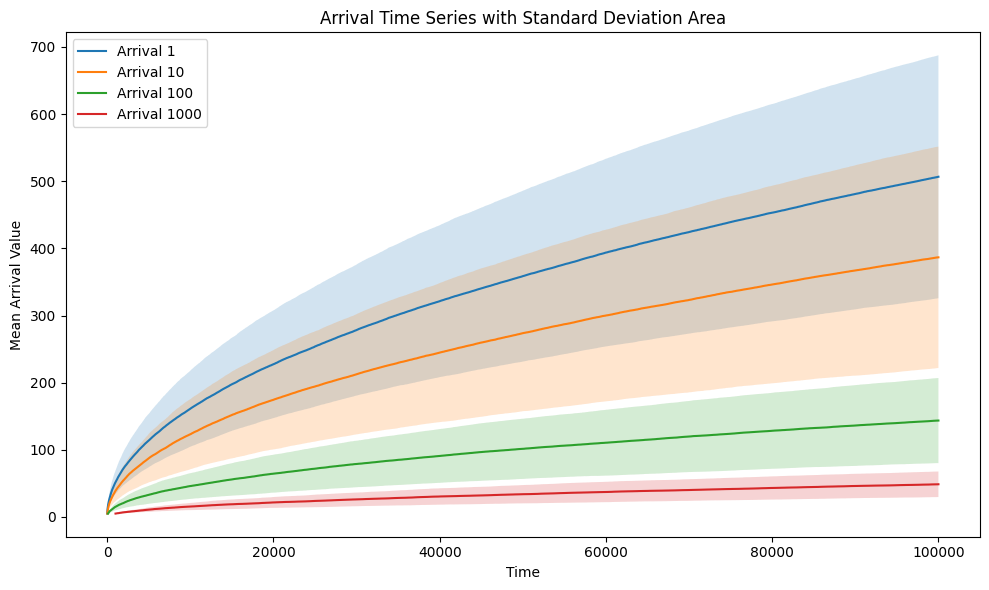

In [9]:
x_1 = np.arange(1, tmax+1)
x_10 = np.arange(10, tmax+1)
x_100 = np.arange(100, tmax+1)
x_1000 = np.arange(1000, tmax+1)

plt.figure(figsize=(10,6))

plt.plot(x_1, mean_arrival_1_ba_preferential, label='Arrival 1')
plt.fill_between(x_1, mean_arrival_1_ba_preferential - std_arrival_1_ba_preferential,
                 mean_arrival_1_ba_preferential + std_arrival_1_ba_preferential, alpha=0.2)

plt.plot(x_10, mean_arrival_10_ba_preferential, label='Arrival 10')
plt.fill_between(x_10, mean_arrival_10_ba_preferential - std_arrival_10_ba_preferential,
                 mean_arrival_10_ba_preferential + std_arrival_10_ba_preferential, alpha=0.2)

plt.plot(x_100, mean_arrival_100_ba_preferential, label='Arrival 100')
plt.fill_between(x_100, mean_arrival_100_ba_preferential - std_arrival_100_ba_preferential,
                 mean_arrival_100_ba_preferential + std_arrival_100_ba_preferential, alpha=0.2)

plt.plot(x_1000, mean_arrival_1000_ba_preferential, label='Arrival 1000')
plt.fill_between(x_1000, mean_arrival_1000_ba_preferential - std_arrival_1000_ba_preferential,
                 mean_arrival_1000_ba_preferential + std_arrival_1000_ba_preferential, alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Mean Arrival Value')
plt.title('Arrival Time Series with Standard Deviation Area')
plt.legend()
plt.tight_layout()
plt.show()

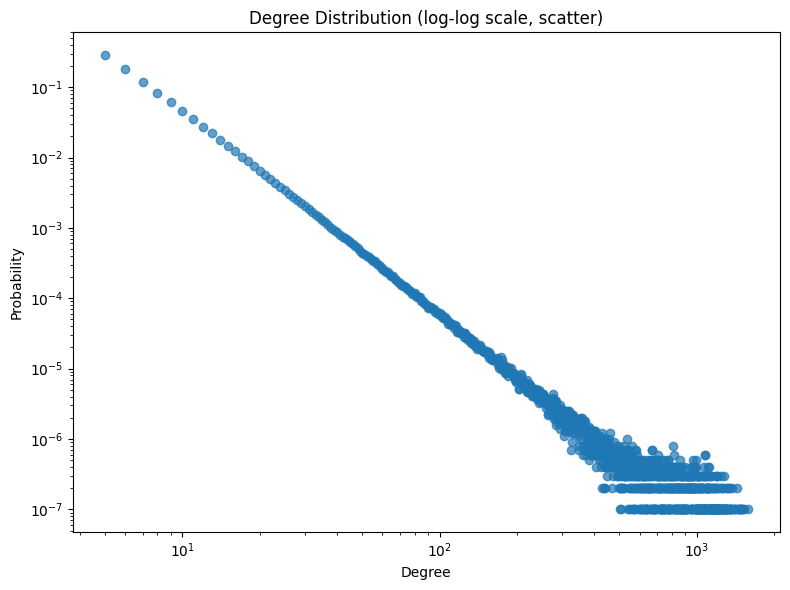

In [10]:
# Flatten the list of lists
all_degrees = np.concatenate(degrees_ba_preferential)

# Get unique degrees and their counts
unique_degrees, counts = np.unique(all_degrees, return_counts=True)
probabilities = counts / counts.sum()

plt.figure(figsize=(8,6))
plt.scatter(unique_degrees, probabilities, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (log-log scale, scatter)')
plt.tight_layout()
plt.show()

In [11]:
def run_simulation_random(_):
    vertex_time_series, degrees = _simulate_ba_random(n0, m0, tmax, arrival_times)
    return (
        degrees,
        vertex_time_series[1][n0],
        vertex_time_series[10][n0+9],
        vertex_time_series[100][n0+99],
        vertex_time_series[1000][n0+999]
    )

results_random = Parallel(n_jobs=-1)(delayed(run_simulation_random)(_ ) for _ in range(n_iters))

degrees_ba_random = [r[0] for r in results_random]
arrival_1_ba_random = [r[1] for r in results_random]
arrival_10_ba_random = [r[2] for r in results_random]
arrival_100_ba_random = [r[3] for r in results_random]
arrival_1000_ba_random = [r[4] for r in results_random]

mean_arrival_1_ba_random = np.mean(arrival_1_ba_random, axis=0)
mean_arrival_10_ba_random = np.mean(arrival_10_ba_random, axis=0)
mean_arrival_100_ba_random = np.mean(arrival_100_ba_random, axis=0)
mean_arrival_1000_ba_random = np.mean(arrival_1000_ba_random, axis=0)

std_arrival_1_ba_random = np.std(arrival_1_ba_random, axis=0)
std_arrival_10_ba_random = np.std(arrival_10_ba_random, axis=0)
std_arrival_100_ba_random = np.std(arrival_100_ba_random, axis=0)
std_arrival_1000_ba_random = np.std(arrival_1000_ba_random, axis=0)

os.makedirs("results_v2_arr", exist_ok=True)
np.savetxt(f"results_v2_arr/mean_arrival_1_ba_random.txt", mean_arrival_1_ba_random)
np.savetxt(f"results_v2_arr/mean_arrival_10_ba_random.txt", mean_arrival_10_ba_random)
np.savetxt(f"results_v2_arr/mean_arrival_100_ba_random.txt", mean_arrival_100_ba_random)
np.savetxt(f"results_v2_arr/mean_arrival_1000_ba_random.txt", mean_arrival_1000_ba_random)

np.savetxt(f"results_v2_arr/std_arrival_1_ba_random.txt", std_arrival_1_ba_random)
np.savetxt(f"results_v2_arr/std_arrival_10_ba_random.txt", std_arrival_10_ba_random)
np.savetxt(f"results_v2_arr/std_arrival_100_ba_random.txt", std_arrival_100_ba_random)
np.savetxt(f"results_v2_arr/std_arrival_1000_ba_random.txt", std_arrival_1000_ba_random)

os.makedirs("results_deg", exist_ok=True)
np.savetxt(f"results_deg/degrees_ba_random.txt", degrees_ba_random)

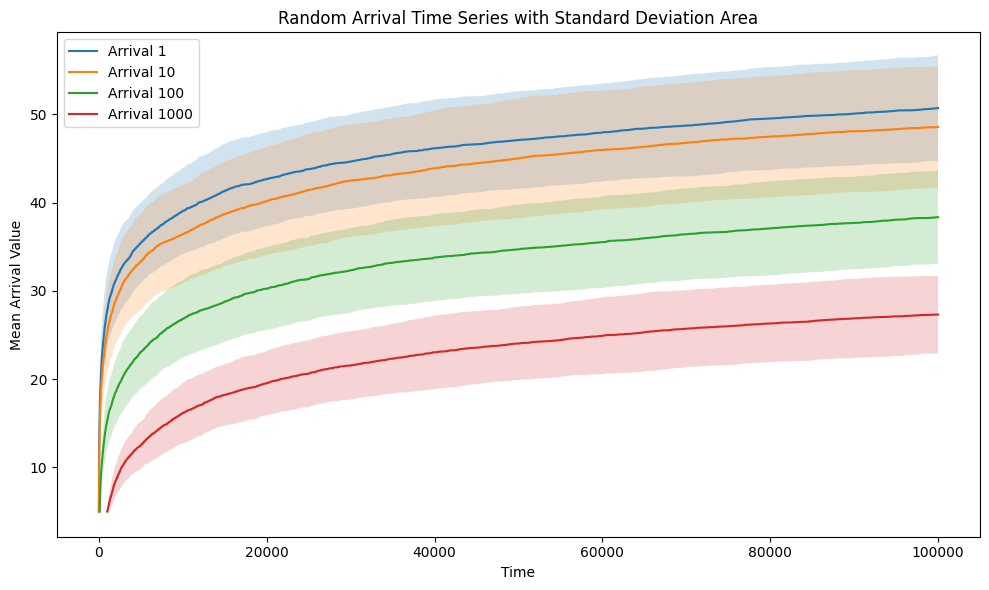

In [12]:
x_1 = np.arange(1, tmax+1)
x_10 = np.arange(10, tmax+1)
x_100 = np.arange(100, tmax+1)
x_1000 = np.arange(1000, tmax+1)

plt.figure(figsize=(10,6))

plt.plot(x_1, mean_arrival_1_ba_random, label='Arrival 1')
plt.fill_between(x_1, mean_arrival_1_ba_random - std_arrival_1_ba_random,
                 mean_arrival_1_ba_random + std_arrival_1_ba_random, alpha=0.2)

plt.plot(x_10, mean_arrival_10_ba_random, label='Arrival 10')
plt.fill_between(x_10, mean_arrival_10_ba_random - std_arrival_10_ba_random,
                 mean_arrival_10_ba_random + std_arrival_10_ba_random, alpha=0.2)

plt.plot(x_100, mean_arrival_100_ba_random, label='Arrival 100')
plt.fill_between(x_100, mean_arrival_100_ba_random - std_arrival_100_ba_random,
                 mean_arrival_100_ba_random + std_arrival_100_ba_random, alpha=0.2)

plt.plot(x_1000, mean_arrival_1000_ba_random, label='Arrival 1000')
plt.fill_between(x_1000, mean_arrival_1000_ba_random - std_arrival_1000_ba_random,
                 mean_arrival_1000_ba_random + std_arrival_1000_ba_random, alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Mean Arrival Value')
plt.title('Random Arrival Time Series with Standard Deviation Area')
plt.legend()
plt.tight_layout()
plt.show()

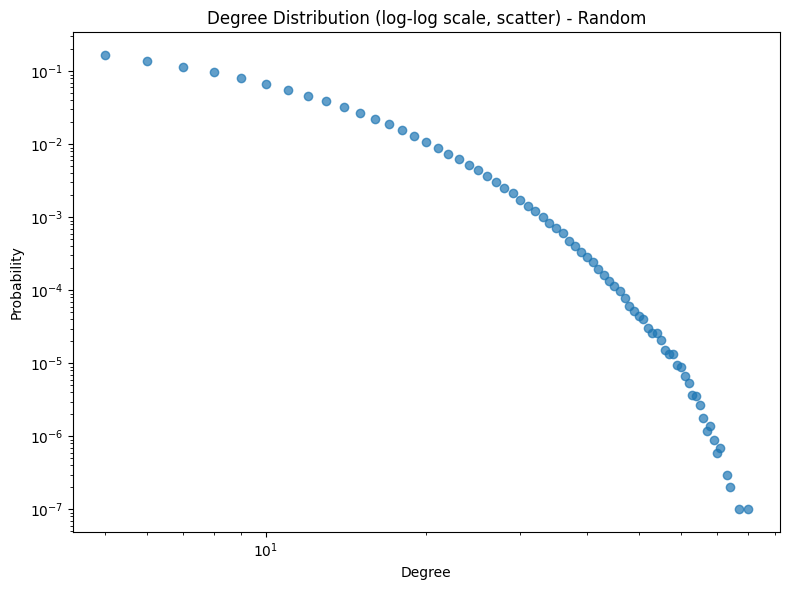

In [13]:
# Flatten the list of lists
all_degrees_random = np.concatenate(degrees_ba_random)

# Get unique degrees and their counts
unique_degrees_random, counts_random = np.unique(all_degrees_random, return_counts=True)
probabilities_random = counts_random / counts_random.sum()

plt.figure(figsize=(8,6))
plt.scatter(unique_degrees_random, probabilities_random, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (log-log scale, scatter) - Random')
plt.tight_layout()
plt.show()

In [ ]:
n0 = 1000
tmax = 20000

In [4]:
degree_evolution_no_growth = defaultdict(list)
degrees_no_growth = []
for _ in range(n_iters):
    degree_evolution, degree_sequence = no_growth_pa(n0, m0, tmax, seed=_)

    degrees_no_growth.append(degree_sequence)
    for key in degree_evolution:
        degree_evolution_no_growth[key].append(degree_evolution[key])

mean_degree_evolution_no_growth = {key: np.mean(degree_evolution_no_growth[key], axis=0) for key in degree_evolution_no_growth}
std_degree_evolution_no_growth = {key: np.std(degree_evolution_no_growth[key], axis=0) for key in degree_evolution_no_growth}

os.makedirs("results_v3", exist_ok=True)
np.savetxt(f"results_v3/mean_degree_evolution_no_growth.txt", np.array([mean_degree_evolution_no_growth[key] for key in sorted(mean_degree_evolution_no_growth)][:4]))
np.savetxt(f"results_v3/std_degree_evolution_no_growth.txt", np.array([std_degree_evolution_no_growth[key] for key in sorted(std_degree_evolution_no_growth)][:4]))

os.makedirs("results_deg", exist_ok=True)
np.savetxt(f"results_deg/degrees_no_growth.txt", degrees_no_growth)

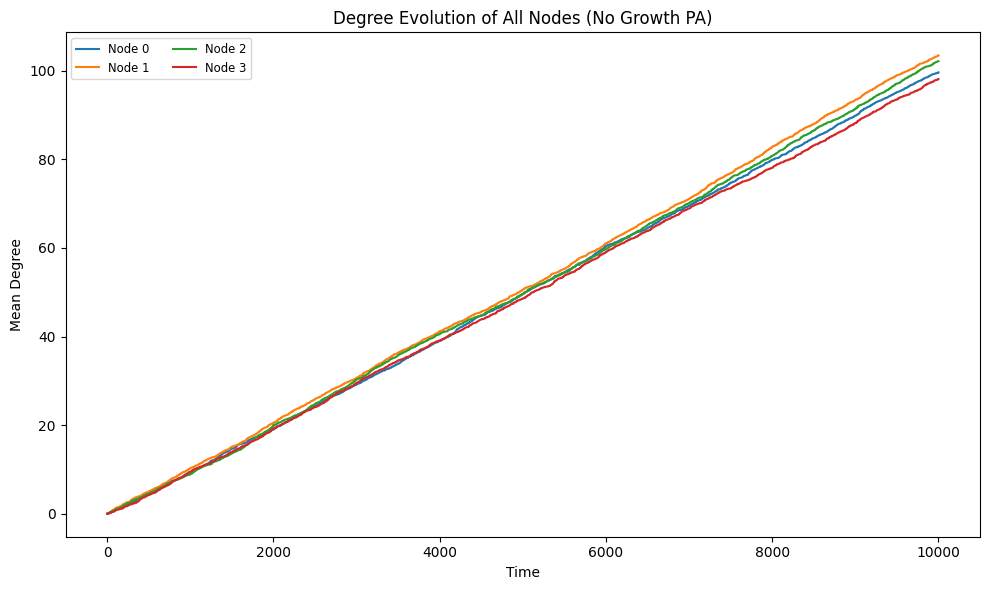

In [ ]:
plt.figure(figsize=(10,6))
for key in sorted(mean_degree_evolution_no_growth)[:4]:
    plt.plot(mean_degree_evolution_no_growth[key], label=f'Node {key}')
plt.xlabel('Time')
plt.ylabel('Mean Degree')
plt.title('Degree Evolution of All Nodes (No Growth PA)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()

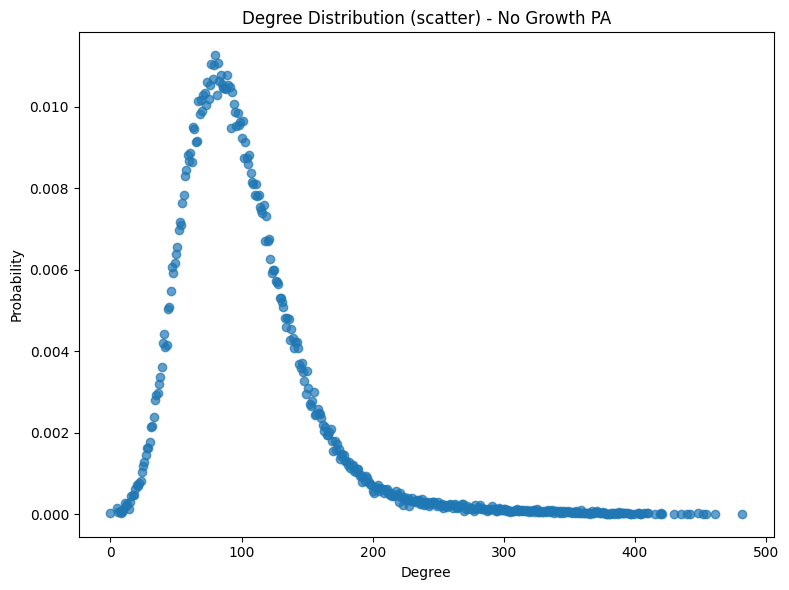

In [ ]:
all_degrees_no_growth = np.concatenate(degrees_no_growth)

unique_degrees_no_growth, counts_no_growth = np.unique(all_degrees_no_growth, return_counts=True)
probabilities_no_growth = counts_no_growth / counts_no_growth.sum()
plt.figure(figsize=(8,6))
plt.scatter(unique_degrees_no_growth, probabilities_no_growth, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (scatter) - No Growth PA')
plt.tight_layout()
plt.show()